<a href="https://colab.research.google.com/github/Mariyaben/Feature_Engineering/blob/main/EDA_Medical_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2000 non-null   object 
 1   gender              2000 non-null   object 
 2   dob                 2000 non-null   object 
 3   zipcode             2000 non-null   int64  
 4   employment_status   2000 non-null   object 
 5   education           2000 non-null   object 
 6   marital_status      2000 non-null   object 
 7   children            2000 non-null   int64  
 8   ancestry            2000 non-null   object 
 9   avg_commute         2000 non-null   float64
 10  daily_internet_use  2000 non-null   float64
 11  available_vehicles  2000 non-null   int64  
 12  military_service    2000 non-null   object 
 13  disease             2000 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 218.9+ KB
None
               id  gender         dob  z

In [ ]:
# Get summary statistics of numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


            zipcode     children  avg_commute  daily_internet_use  \
count   2000.000000  2000.000000  2000.000000         2000.000000   
mean   63387.827500     2.266500    30.376895            4.993325   
std    30165.490876     1.615792    10.026961            1.387846   
min    10001.000000     0.000000    -2.470000            1.010000   
25%    43221.000000     1.000000    23.460000            4.020000   
50%    60612.000000     2.000000    30.320000            5.010000   
75%    90008.000000     3.000000    37.127500            5.972500   
max    94110.000000     7.000000    63.730000            8.820000   

       available_vehicles  
count         2000.000000  
mean             1.746000  
std              1.118977  
min              0.000000  
25%              1.000000  
50%              2.000000  
75%              3.000000  
max              4.000000  
id                    0
gender                0
dob                   0
zipcode               0
employment_status     0
educat

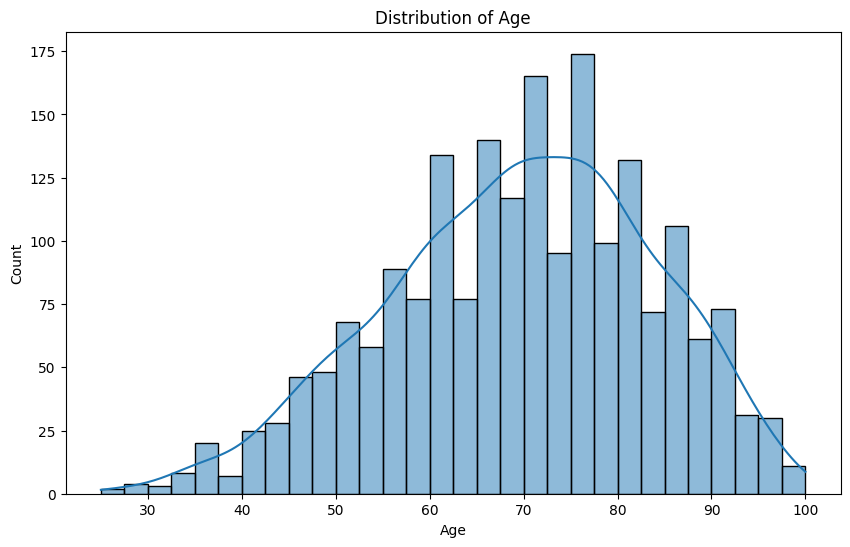

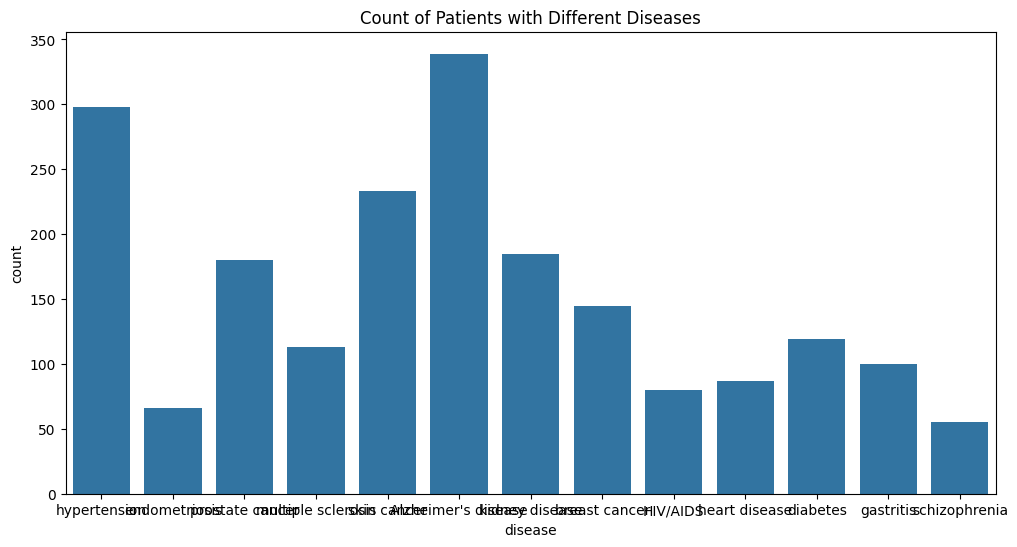

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Count of categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='disease', data=df)
plt.title('Count of Patients with Different Diseases')
plt.show()


In [ ]:
# Scatter plot with regression line for another variable (e.g., 'Cholesterol')
plt.figure(figsize=(12, 8))
sns.regplot(x='Age', y='diabetes', data=df)
plt.title('Relationship between Age and diabetes')
plt.show()

# Boxplot for categorical variable vs. numerical variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='disease', y='diabetes', data=df)
plt.title('diabetes Levels for Different Diseases')
plt.show()


KeyError: 'diabetes'

<Figure size 1200x800 with 0 Axes>

<ipython-input-6-c520efca4753>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


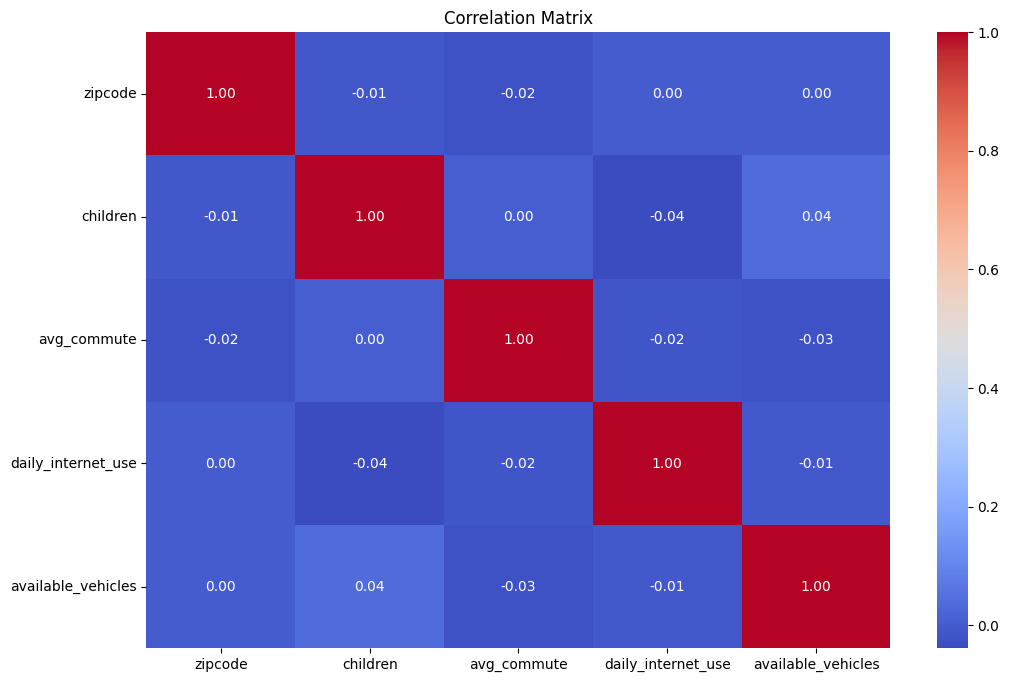

In [ ]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


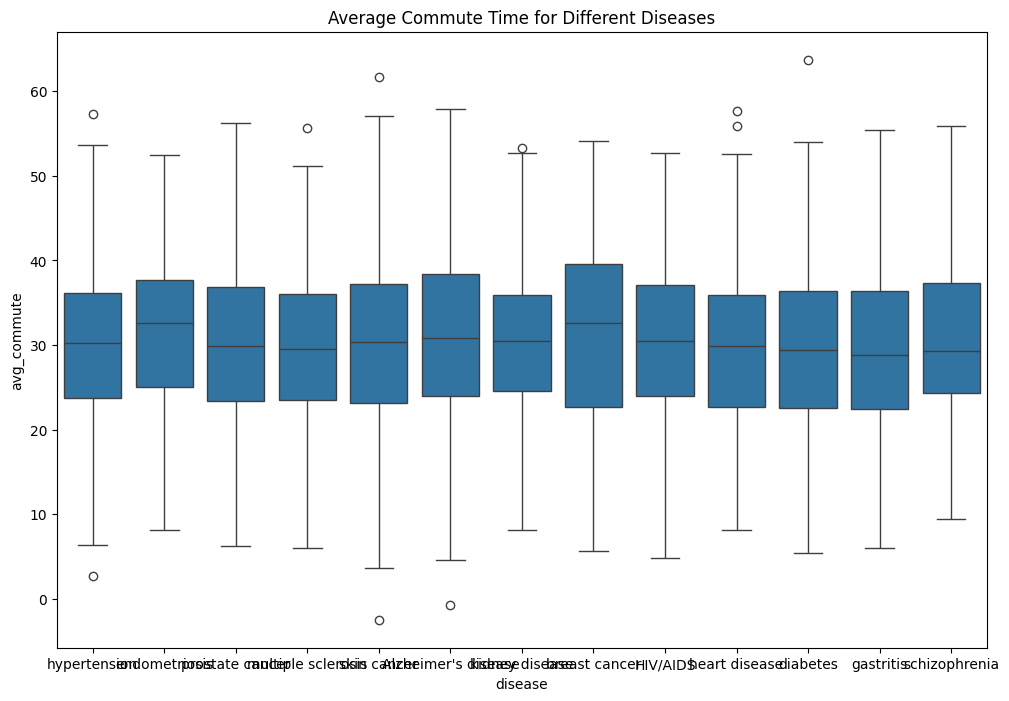

In [ ]:
# Boxplot for outlier detection using 'avg_commute'
plt.figure(figsize=(12, 8))
sns.boxplot(x='disease', y='avg_commute', data=df)
plt.title('Average Commute Time for Different Diseases')
plt.show()



In [ ]:
# Creating new features or transforming existing ones
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51-100'])


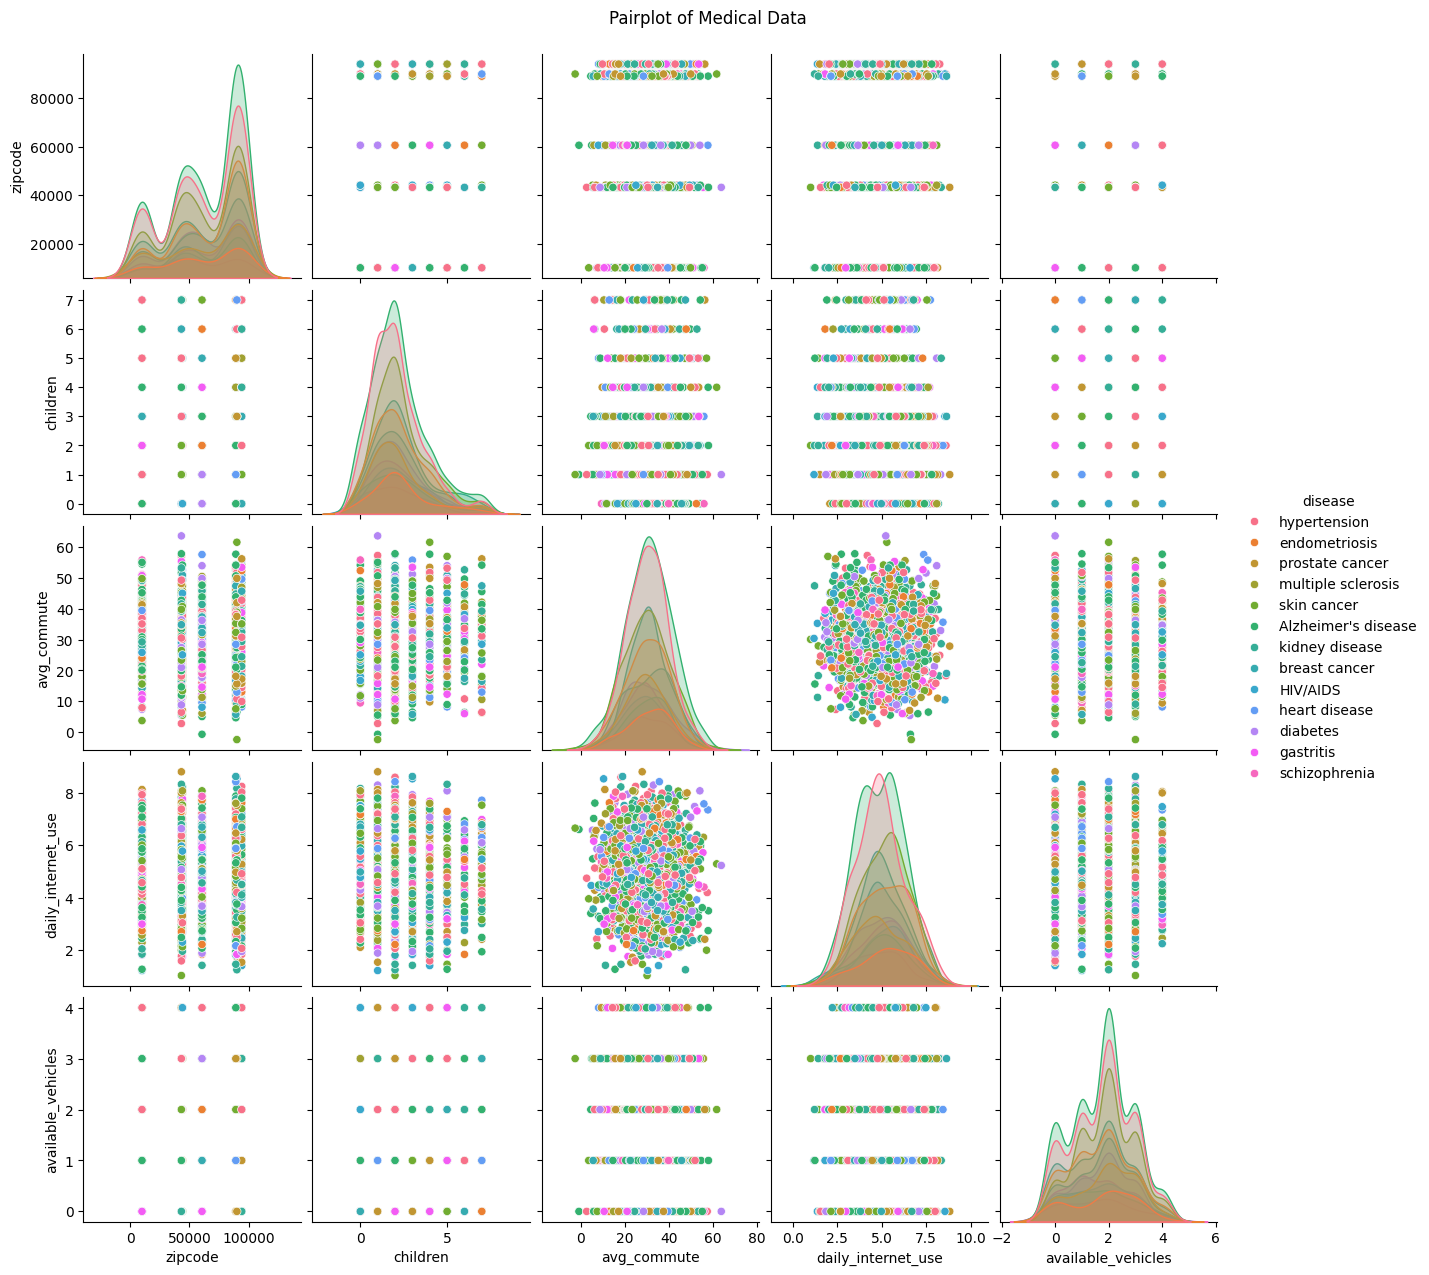

In [ ]:
# Pairplot for multiple variable relationships
sns.pairplot(df, hue='disease', diag_kind='kde')
plt.suptitle('Pairplot of Medical Data', y=1.02)
plt.show()


In [ ]:
# Assuming 'dob' is the date of birth column, let's calculate age
from datetime import datetime

# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'])

# Calculate age
df['Age'] = (datetime.now() - df['dob']).astype('<m8[Y]')

# Drop the 'dob' column as it's no longer needed
df = df.drop('dob', axis=1)

# Now you can proceed with the rest of the analysis using 'Age'
